In [1]:
%matplotlib inline
from decimal import Decimal
import itertools
from pprint import pprint

import common
import simulate
import plot
import market
import harvesting
import adt

from matplotlib import pyplot as plt
import matplotlib

In [2]:
def compare_for(year, length=40):
    common.compare_prime_vs_rebalancing(market.Returns_US_1871().iter_from(year), title='Annual income for %d retiree' % year, years=length)

def stocks_time(year, length=40):
    x = simulate.withdrawals(market.Returns_US_1871().iter_from(year), years=length)
    stock_pct = [n.portfolio_stocks / n.portfolio_n * 100 for n in x]
    plot.plot(stock_pct, y_label='Stock %', x_label='Year of retirement', title='%d retiree: stock percentage' % year)

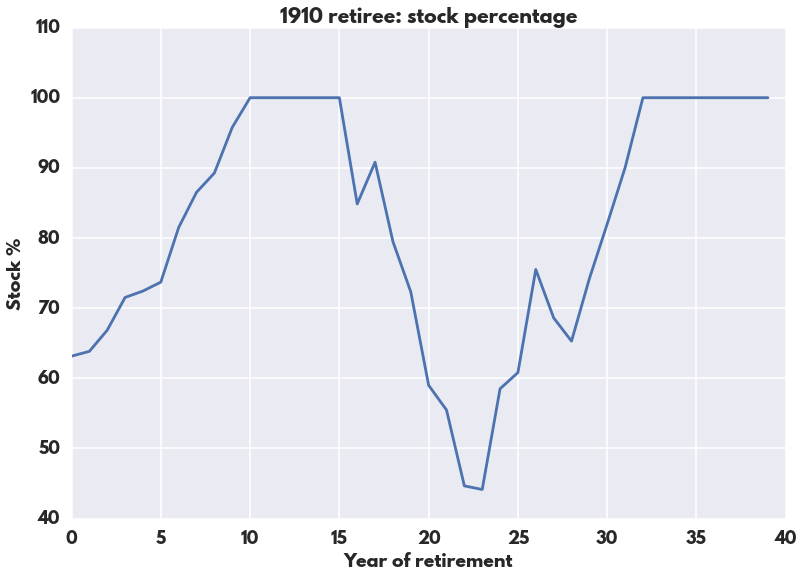

In [3]:
stocks_time(1910, length=40)

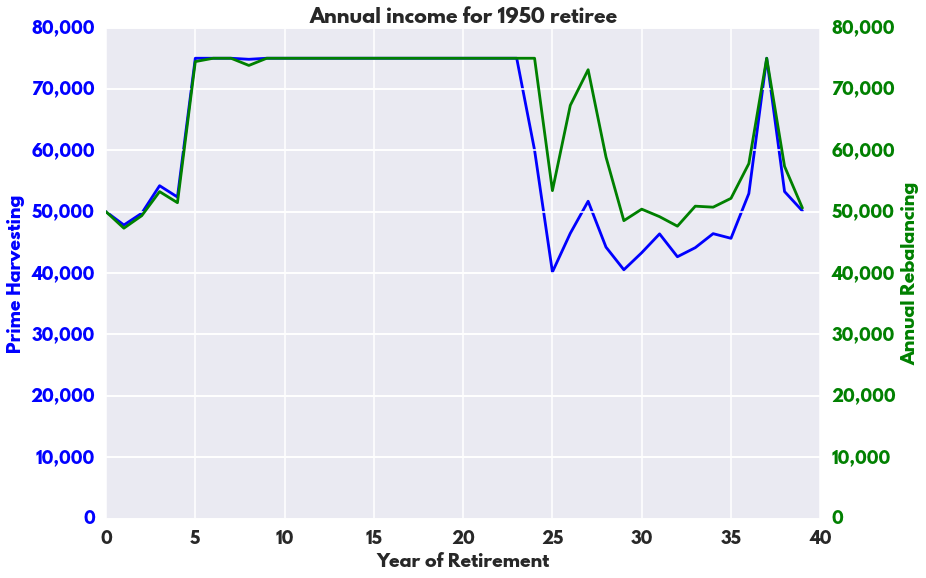

In [4]:
compare_for(1950)

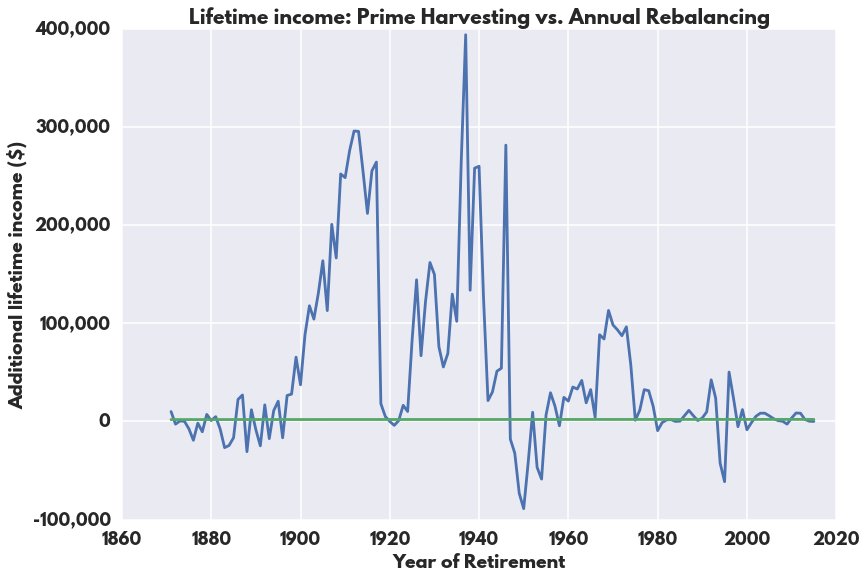

In [5]:
data_series = market.Returns_US_1871()

diff = []

for i in range(data_series.years_of_data):
    year = i + 1871
    YEARS = 30
    p = (600000,400000)

    (s1, s2) = itertools.tee(data_series.iter_from(year))
    x = simulate.withdrawals(s1, years=YEARS, portfolio=p)
    y = simulate.withdrawals(s2, years=YEARS, harvesting=harvesting.N_60_RebalanceHarvesting, portfolio=p)
    
    prime_income = sum([n.withdraw_r for n in x])
    rebalance_income = sum([n.withdraw_r for n in y])
    
    diff.append((prime_income - rebalance_income, year))

plt.subplot(111).yaxis.set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#pprint(sorted(diff))
plt.ylabel('Additional lifetime income ($)')
plt.xlabel('Year of Retirement')
plt.title('Lifetime income: Prime Harvesting vs. Annual Rebalancing')
plt.plot(range(1871, 1871 + len(diff)), diff)

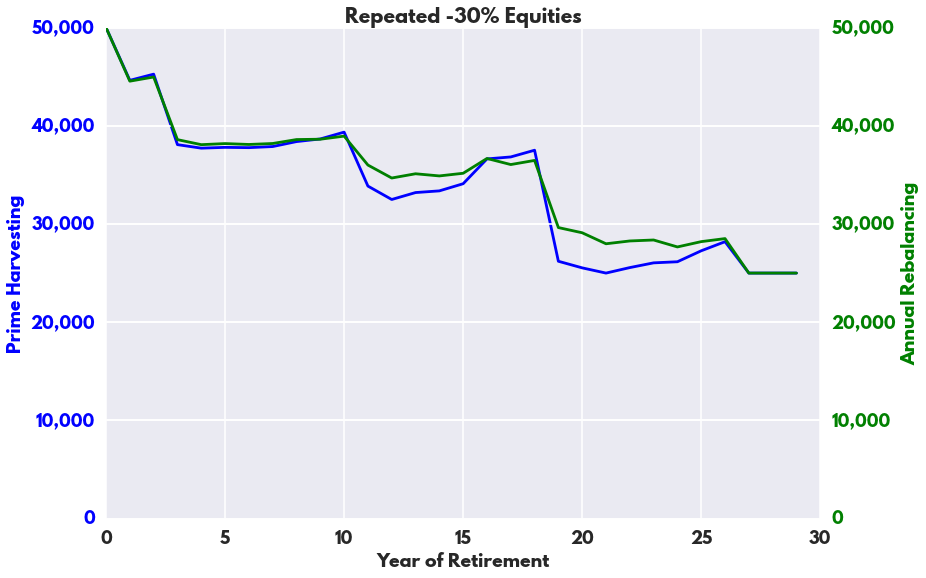

In [6]:
def r():
    yield adt.AnnualChange(year=1, stocks=Decimal('.08'), bonds=Decimal('.02'), inflation=Decimal('0'))
    yield adt.AnnualChange(year=2, stocks=Decimal('.08'), bonds=Decimal('.02'), inflation=Decimal('0'))
    yield adt.AnnualChange(year=3, stocks=Decimal('-.3'), bonds=Decimal('.02'), inflation=Decimal('0'))
    yield adt.AnnualChange(year=4, stocks=Decimal('0'), bonds=Decimal('.02'), inflation=Decimal('0'))
    for i in range(3):
        yield adt.AnnualChange(year=5, stocks=Decimal('.06'), bonds=Decimal('.02'), inflation=Decimal('0'))
    for i in range(1):
        yield adt.AnnualChange(year=6, stocks=Decimal('.10'), bonds=Decimal('.02'), inflation=Decimal('0'))

common.compare_prime_vs_rebalancing(itertools.cycle(r()), title='Repeated -30% Equities')

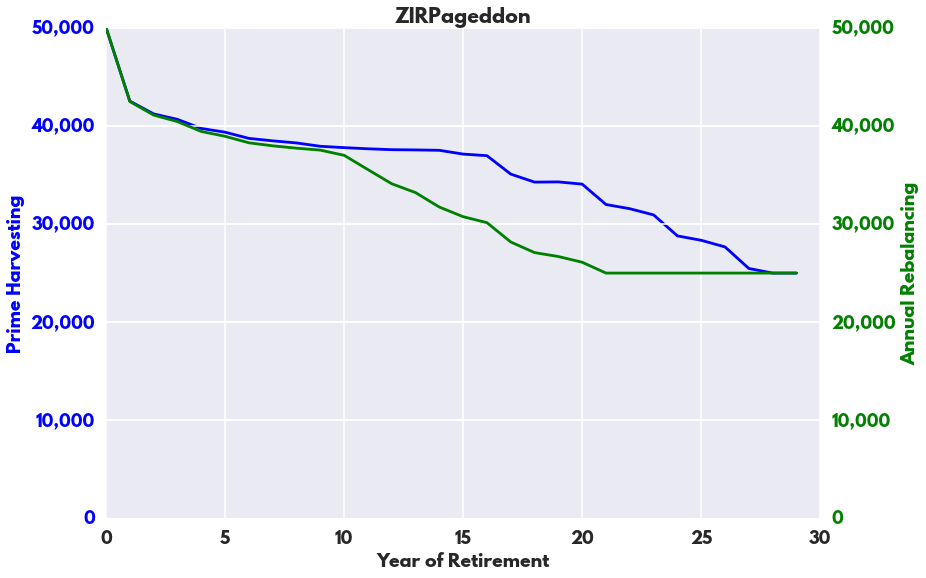

In [8]:
common.compare_prime_vs_rebalancing(market.zirp_returns(), title='ZIRPageddon')